In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dta
import scipy.stats as st

# File to Load (Remember to Change These)
file_mex = "200906COVID19MEXICO.csv"
mex_data = pd.read_csv(file_mex, encoding= 'unicode_escape')
mex_data



# File and store into Pandas data frame


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-09-06,059369,2,4,25,1,25,25,1,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
1,2020-09-06,0e85b3,2,4,9,2,12,9,17,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,2020-09-06,07d239,2,3,15,1,9,15,106,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
3,2020-09-06,1b6ee6,2,4,23,1,30,23,5,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-09-06,0cb658,2,4,9,1,9,15,58,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431628,2020-09-06,079319,2,12,15,2,15,15,48,1,...,2,2,2,2,1,3,99,MÃ©xico,99,97
1431629,2020-09-06,1bf8c0,2,4,19,1,19,19,12,1,...,2,2,2,2,2,3,99,MÃ©xico,99,97
1431630,2020-09-06,047a3d,2,9,5,2,5,5,9,1,...,2,2,2,2,2,3,99,MÃ©xico,99,97
1431631,2020-09-06,0c645b,1,9,9,1,9,15,81,1,...,2,2,2,2,2,3,99,MÃ©xico,99,97


In [8]:
mex_data.count()

FECHA_ACTUALIZACION    1431633
ID_REGISTRO            1431633
ORIGEN                 1431633
SECTOR                 1431633
ENTIDAD_UM             1431633
SEXO                   1431633
ENTIDAD_NAC            1431633
ENTIDAD_RES            1431633
MUNICIPIO_RES          1431633
TIPO_PACIENTE          1431633
FECHA_INGRESO          1431633
FECHA_SINTOMAS         1431633
FECHA_DEF              1431633
INTUBADO               1431633
NEUMONIA               1431633
EDAD                   1431633
NACIONALIDAD           1431633
EMBARAZO               1431633
HABLA_LENGUA_INDIG     1431633
DIABETES               1431633
EPOC                   1431633
ASMA                   1431633
INMUSUPR               1431633
HIPERTENSION           1431633
OTRA_COM               1431633
CARDIOVASCULAR         1431633
OBESIDAD               1431633
RENAL_CRONICA          1431633
TABAQUISMO             1431633
OTRO_CASO              1431633
RESULTADO              1431633
MIGRANTE               1431633
PAIS_NAC

In [10]:
mex_sex = mex_data.drop(['FECHA_ACTUALIZACION',
'ORIGEN',
'SECTOR',
'ENTIDAD_UM',
'ENTIDAD_NAC',
'ENTIDAD_RES',
'MUNICIPIO_RES',
'TIPO_PACIENTE',
'FECHA_INGRESO',
'FECHA_SINTOMAS',
'FECHA_DEF',
'INTUBADO',
'NEUMONIA',
'EDAD',
'NACIONALIDAD',
'EMBARAZO',
'HABLA_LENGUA_INDIG',
'DIABETES',
'EPOC',
'ASMA',
'INMUSUPR',
'HIPERTENSION',
'OTRA_COM',
'CARDIOVASCULAR',
'OBESIDAD',
'RENAL_CRONICA',
'TABAQUISMO',
'OTRO_CASO',
'RESULTADO',
'MIGRANTE',
'PAIS_NACIONALIDAD',
'PAIS_ORIGEN',
'UCI',
], axis=1)
mex_sex = mex_sex.dropna(subset=['SEXO'])

mex_sex = mex_sex.groupby(['SEXO'])
msex_plot = mex_sex.count()


,ID_REGISTRO
SEXO,
1,726460
2,705173


In [18]:
msex_plot = msex_plot.rename(index={1: 'male'})
msex_plot = msex_plot.rename(index={2: 'female'})

msex_plot

,ID_REGISTRO
SEXO,
male,726460
female,705173


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B01A39160>],
      dtype=object)

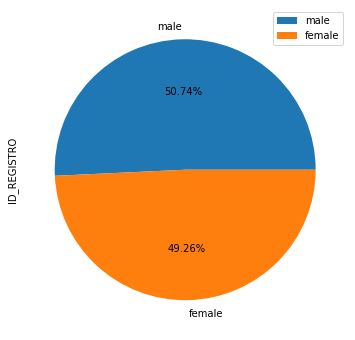

In [19]:
msex_plot.plot.pie(subplots=True,autopct="%1.2f%%", figsize=(11, 6))


In [25]:
mex_age = mex_data.drop(['FECHA_ACTUALIZACION',
'ORIGEN',
'SECTOR',
'ENTIDAD_UM',
'ENTIDAD_NAC',
'ENTIDAD_RES',
'MUNICIPIO_RES',
'TIPO_PACIENTE',
'FECHA_INGRESO',
'FECHA_SINTOMAS',
'FECHA_DEF',
'INTUBADO',
'NEUMONIA',
'SEXO',
'NACIONALIDAD',
'EMBARAZO',
'HABLA_LENGUA_INDIG',
'DIABETES',
'EPOC',
'ASMA',
'INMUSUPR',
'HIPERTENSION',
'OTRA_COM',
'CARDIOVASCULAR',
'OBESIDAD',
'RENAL_CRONICA',
'TABAQUISMO',
'OTRO_CASO',
'RESULTADO',
'MIGRANTE',
'PAIS_NACIONALIDAD',
'PAIS_ORIGEN',
'UCI'
], axis=1)
mex_age = mex_age.dropna(subset=['EDAD'])
mex_age['Age group'] = pd.cut(mex_age.EDAD,
                            bins = [0,9,19,29,39,49,59,69,79,120], labels = ['<10', '10-19', '20-29', '30-39', '40-49','50-59', '60-69', '70-79','+80'])
mex_age = mex_age.drop(['EDAD'], axis = 1)
mex_age = mex_age.groupby(['Age group'])
mage_plot = mex_age.count()
mage_plot

,ID_REGISTRO
Age group,
<10,24541
10-19,53628
20-29,253590
30-39,338776
40-49,303068
50-59,227761
60-69,128429
70-79,64668
+80,30772


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B021FF6A0>],
      dtype=object)

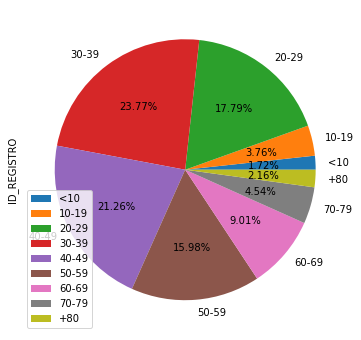

In [26]:
mage_plot.plot.pie(subplots=True,autopct="%1.2f%%", figsize=(11, 6))

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text major ticklabel objects>)

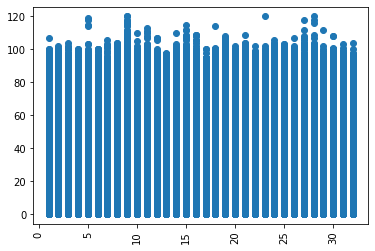

In [35]:
plt.scatter(mex_data['ENTIDAD_UM'], mex_data ['EDAD'], )
plt.xticks(rotation=90)


In [32]:
mex_corr = mex_data.corr()
mc = mex_corr.unstack().sort_values()
mc.tail(40)


CARDIOVASCULAR      ASMA                  0.900670
ASMA                CARDIOVASCULAR        0.900670
CARDIOVASCULAR      RENAL_CRONICA         0.909771
RENAL_CRONICA       CARDIOVASCULAR        0.909771
ASMA                EPOC                  0.914609
EPOC                ASMA                  0.914609
ENTIDAD_RES         ENTIDAD_UM            0.974564
ENTIDAD_UM          ENTIDAD_RES           0.974564
SEXO                EMBARAZO              0.992788
EMBARAZO            SEXO                  0.992788
UCI                 INTUBADO              0.999987
INTUBADO            UCI                   0.999987
ORIGEN              ORIGEN                1.000000
RESULTADO           RESULTADO             1.000000
SECTOR              SECTOR                1.000000
ENTIDAD_UM          ENTIDAD_UM            1.000000
SEXO                SEXO                  1.000000
ENTIDAD_NAC         ENTIDAD_NAC           1.000000
ENTIDAD_RES         ENTIDAD_RES           1.000000
MUNICIPIO_RES       MUNICIPIO_R